In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [53]:
# Load and preprocess data
df = pd.read_csv('mnist_train.csv')
df1 = pd.read_csv('mnist_test.csv')

In [54]:
df.shape


(59999, 785)

In [55]:
df1.shape

(9999, 785)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


In [58]:
# Convert to numpy arrays
data = np.array(df)
data1 = np.array(df1)

In [59]:
# Get shapes
m, n = data.shape
m1, n1 = data1.shape

In [60]:
# Shuffle data
np.random.shuffle(data)
np.random.shuffle(data1)

In [61]:
# Split features and labels correctly
# For training data
X_train = data[:, 1:].T  # Features (784 pixels)
y_train = data[:, 0]     # Labels (digit classes)

In [ ]:
# For test/dev data
X_dev = data1[:, 1:].T   # Features (784 pixels)
y_dev = data1[:, 0]      # Labels (digit classes)

# Normalize inputs
X_train = X_train / 255.0
X_dev = X_dev / 255.0

print(f"Training data shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test data shape: X_dev {X_dev.shape}, y_dev {y_dev.shape}")

Training data shape: X_train (784, 59999), y_train (59999,)
Test data shape: X_dev (784, 9999), y_dev (9999,)


In [63]:
# 1. Initialize Parameters
def init_parameters():
    W1 = np.random.randn(64, 784) * 0.01
    b1 = np.zeros((64, 1))
    W2 = np.random.randn(10, 64) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

# 2. Activation Functions
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Numerical stability
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

# 3. Forward Propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return A2, Z1, A1, Z2

# 4. One-Hot Encoding
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

# 5. Derivative of ReLU
def derive_ReLU(Z):
    return (Z > 0).astype(float)

# 6. Backward Propagation
def backward_propagation(y, Z1, Z2, A1, A2, W2, X):
    one_hot_y = one_hot(y)
    m = y.size
    
    dz2 = A2 - one_hot_y
    dW2 = np.dot(dz2, A1.T) / m
    db2 = np.sum(dz2, axis=1, keepdims=True) / m
    
    dz1 = np.dot(W2.T, dz2) * derive_ReLU(Z1)
    dW1 = np.dot(dz1, X.T) / m
    db1 = np.sum(dz1, axis=1, keepdims=True) / m
    
    return dW1, db1, dW2, db2

# 7. Update Parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# 8. Cost function
def compute_cost(A2, y):
    m = y.size
    one_hot_y = one_hot(y)
    # Cross-entropy loss
    cost = -np.sum(one_hot_y * np.log(A2 + 1e-8)) / m
    return cost

# 9. Prediction function
def predict(X, W1, b1, W2, b2):
    A2, _, _, _ = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)

# 10. Gradient Descent (Training Loop)
def gradient_descent(X, y, W1, b1, W2, b2, learning_rate, epochs):
    costs = []
    
    for epoch in range(epochs):
        # Forward propagation
        A2, Z1, A1, Z2 = forward_propagation(X, W1, b1, W2, b2)
        
        # Compute cost
        cost = compute_cost(A2, y)
        costs.append(cost)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(y, Z1, Z2, A1, A2, W2, X)
        
        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        # Print progress
        if epoch % 100 == 0:
            predictions = predict(X, W1, b1, W2, b2)
            accuracy = np.mean(predictions == y)
            print(f'Epoch {epoch}, Cost: {cost:.4f}, Accuracy: {accuracy:.4f}')
    
    return W1, b1, W2, b2, costs

In [64]:
# 11. Training and Evaluation
def train_and_evaluate():
    # Initialize parameters
    W1, b1, W2, b2 = init_parameters()
    
    # Train the model
    print("Training the model...")
    W1, b1, W2, b2, costs = gradient_descent(X_train, y_train, W1, b1, W2, b2, 
                                           learning_rate=0.1, epochs=1000)
    
    # Evaluate on training data
    train_predictions = predict(X_train, W1, b1, W2, b2)
    train_accuracy = np.mean(train_predictions == y_train)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    
    # Evaluate on test data
    test_predictions = predict(X_dev, W1, b1, W2, b2)
    test_accuracy = np.mean(test_predictions == y_dev)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Plot cost function
    plt.figure(figsize=(10, 6))
    plt.plot(costs)
    plt.title('Cost Function Over Time')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()
    
    return W1, b1, W2, b2


In [66]:
def show_random_prediction(X_dev, y_dev, W1, b1, W2, b2):
    import random
    index = random.randint(0, X_dev.shape[1] - 1)
    image = X_dev[:, index].reshape(28, 28)  # reshape flat image to 28x28
    label = y_dev[index]
    
    # Predict
    prediction = predict(X_dev[:, index].reshape(-1, 1), W1, b1, W2, b2)[0]

    # Plot
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {prediction}, Actual: {label}")
    plt.axis('off')
    plt.show()


Training the model...
Epoch 0, Cost: 2.3028, Accuracy: 0.1020
Epoch 100, Cost: 1.1098, Accuracy: 0.7312
Epoch 200, Cost: 0.5496, Accuracy: 0.8579
Epoch 300, Cost: 0.4262, Accuracy: 0.8853
Epoch 400, Cost: 0.3757, Accuracy: 0.8964
Epoch 500, Cost: 0.3475, Accuracy: 0.9027
Epoch 600, Cost: 0.3284, Accuracy: 0.9077
Epoch 700, Cost: 0.3142, Accuracy: 0.9111
Epoch 800, Cost: 0.3027, Accuracy: 0.9139
Epoch 900, Cost: 0.2928, Accuracy: 0.9166
Training Accuracy: 0.9194
Test Accuracy: 0.9216


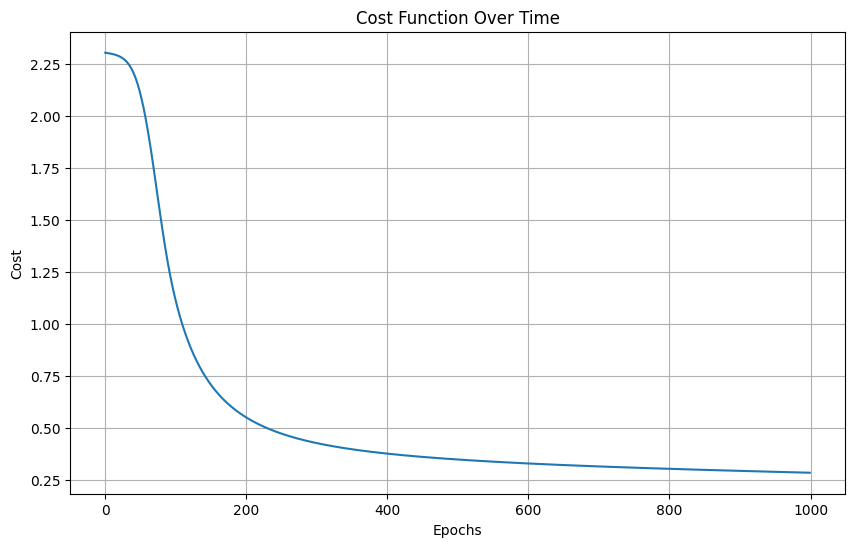

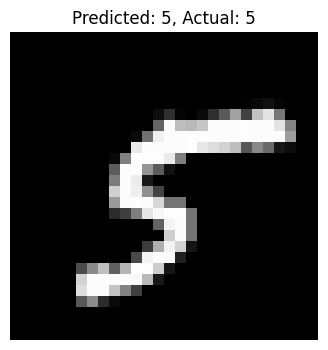

In [67]:
# Run the training
if __name__ == "__main__":
    W1, b1, W2, b2 = train_and_evaluate()
    # Show random test prediction
    show_random_prediction(X_dev, y_dev, W1, b1, W2, b2)
